# Importing the libraries

In [190]:
import prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import time
import regex
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,precision_score,recall_score,f1_score,mean_absolute_error
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

### Import the dataset 

In [191]:
df = pd.read_csv("new_data.csv")
df

,Unnamed: 0,spend,clicks,impressions,sales,orders,ROAS,bid,price,id,date
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.016817e+10,2022-07-24
1,1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,6.016817e+10,2022-07-29
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.016817e+10,2022-07-30
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.016817e+10,2022-08-01
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.016817e+10,2022-08-03
...,...,...,...,...,...,...,...,...,...,...,...
253041,266268,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.811490e+14,2022-11-07
253042,266269,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.811490e+14,2022-11-08
253043,266270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.811490e+14,2022-11-09
253044,266271,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.813040e+14,2022-07-27


In [192]:
# Dropping and renaming the columns

In [193]:
df.drop(columns = "Unnamed: 0",inplace = True)
df['Date'] = pd.to_datetime(df['date'])
df.drop(columns='date',inplace = True)
df.rename(columns = {"bid":"y","Date":"ds"},inplace = True)
df.drop(columns = "id",inplace = True)

In [194]:
# Checking the datatypes
df.dtypes

spend                 float64
clicks                float64
impressions           float64
sales                 float64
orders                float64
ROAS                  float64
y                     float64
price                 float64
ds             datetime64[ns]
dtype: object

In [195]:
df

,spend,clicks,impressions,sales,orders,ROAS,y,price,ds
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-24
1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2022-07-29
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-30
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-01
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-03
...,...,...,...,...,...,...,...,...,...
253041,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-11-07
253042,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2022-11-08
253043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-11-09
253044,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2022-07-27


In [196]:
# Resetting the index
df.reset_index(inplace = True)
df.head()

,index,spend,clicks,impressions,sales,orders,ROAS,y,price,ds
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-24
1,1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2022-07-29
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-30
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-01
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-03


In [197]:
# Dropping the column index
df.drop(columns = 'index',inplace = True)
df.head()

,spend,clicks,impressions,sales,orders,ROAS,y,price,ds
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-24
1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2022-07-29
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-30
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-01
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-03


In [198]:
## Splitting the dataset into 70:30 ratio

In [199]:
train_df = df[(df["ds"]>='2022-07-22') & (df["ds"]<='2022-10-06')]
test_df = df[(df["ds"]>='2022-10-06') & (df["ds"]<='2022-11-14')]

In [200]:
train_df

,spend,clicks,impressions,sales,orders,ROAS,y,price,ds
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-24
1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2022-07-29
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-07-30
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-01
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-08-03
...,...,...,...,...,...,...,...,...,...
253038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-09-30
253039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-10-01
253040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-10-02
253044,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2022-07-27


In [201]:
test_df['ds'].nunique()

40

In [202]:
# Performing the shifting operation to standarize

In [203]:
train_df['y'] = train_df['y'] - train_df['y'].shift(1)
train_df['y'] = train_df['y'] - train_df['y'].shift(1)

In [204]:
test_df['y'] = test_df['y'] - test_df['y'].shift(1)
test_df['y'] = test_df['y'] - test_df['y'].shift(1)

# Model building

In [205]:
m = Prophet(interval_width=0.90,weekly_seasonality = True,daily_seasonality=True,yearly_seasonality=True)

In [206]:
df.columns

Index(['spend', 'clicks', 'impressions', 'sales', 'orders', 'ROAS', 'y',
       'price', 'ds'],
      dtype='object')

#### adding the multivariate functionality 

In [207]:
m.add_regressor('spend',standardize=False)
m.add_regressor('clicks',standardize=False)
m.add_regressor('sales',standardize=False)
m.add_regressor('ROAS',standardize=False)

####  fitting the model

In [208]:
m.fit(train_df)

13:45:18 - cmdstanpy - INFO - Chain [1] start processing
13:45:32 - cmdstanpy - INFO - Chain [1] done processing


In [209]:
# making future predictions for the next 365 days

future = m.make_future_dataframe(periods=365)
future

,ds
0,2022-07-22
1,2022-07-23
2,2022-07-24
3,2022-07-25
4,2022-07-26
...,...
437,2023-10-02
438,2023-10-03
439,2023-10-04
440,2023-10-05


In [210]:
# Adding the extra columns in the future dataframe

In [211]:
future["spend"] = df['spend']
future["clicks"] = df["clicks"]
future["sales"] = df["sales"]
future["ROAS"] = df["ROAS"]

In [212]:
future

,ds,spend,clicks,sales,ROAS
0,2022-07-22,0.00,0.0,0.0,0.0
1,2022-07-23,0.00,0.0,0.0,0.0
2,2022-07-24,0.00,0.0,0.0,0.0
3,2022-07-25,0.00,0.0,0.0,0.0
4,2022-07-26,0.00,0.0,0.0,0.0
...,...,...,...,...,...
437,2023-10-02,0.00,0.0,0.0,0.0
438,2023-10-03,0.00,0.0,0.0,0.0
439,2023-10-04,0.00,0.0,0.0,0.0
440,2023-10-05,0.00,0.0,0.0,0.0


In [213]:
##  Predicting the future values for the next 365 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
437,2023-10-02,-0.761717,-10.741894,8.784483
438,2023-10-03,-0.609658,-9.982633,9.412063
439,2023-10-04,-0.636746,-11.109617,8.899302
440,2023-10-05,-0.604834,-11.148906,8.552242
441,2023-10-06,-0.620268,-9.808788,9.263150


In [214]:
# Checking on a particular day
forecast[forecast['ds'] == '2022-10-22'][['yhat_upper','yhat_lower']]

,yhat_upper,yhat_lower
92,9.650765,-9.149618


## Plotting the curves for visualizations

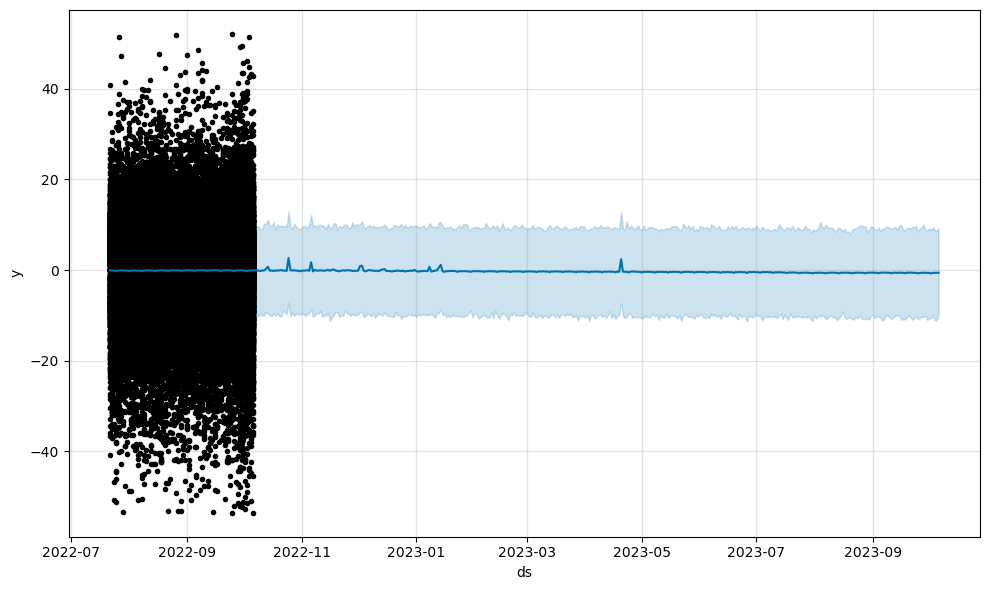

In [215]:
fig1 = m.plot(forecast)

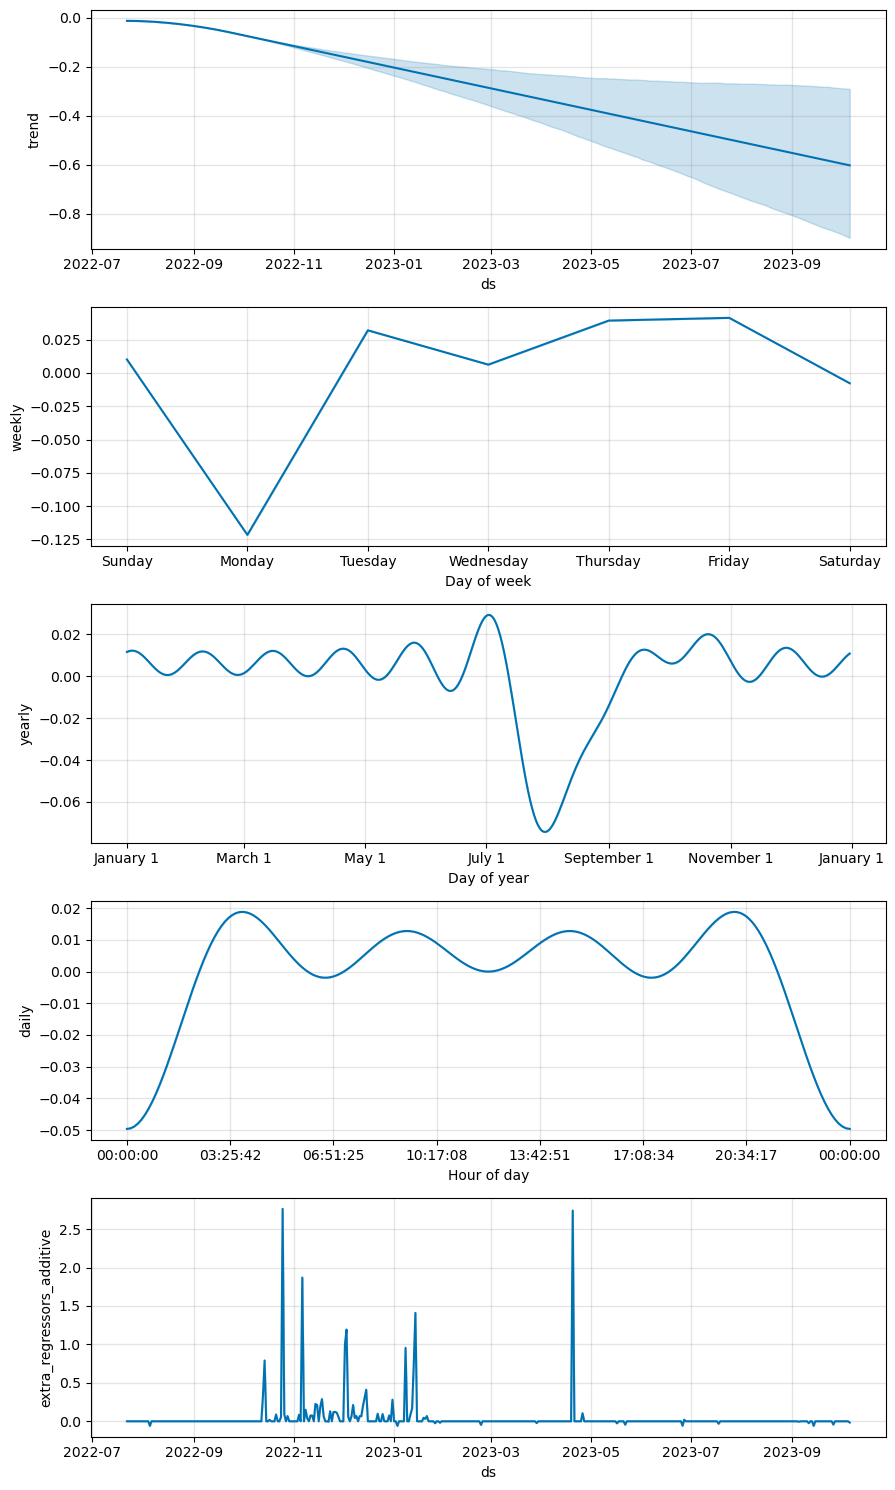

In [216]:
fig2 = m.plot_components(forecast)

# Building a predictive system

In [217]:
def enter_date():
    date = input(" Enter the date in YYYY-MM-DD order:  ")
    a = forecast[forecast['ds'] == date][['yhat','yhat_upper','weekly','weekly_upper']]
    a.rename(columns = {"yhat":"bid","yhat_upper":"bid_highest","weekly_upper":"weekly_high"},inplace = True)
    return a

In [218]:
enter_date()

 Enter the date in YYYY-MM-DD order:  2023-05-31


,bid,bid_highest,weekly,weekly_high
313,-0.449441,8.646036,0.006281,0.006281
